In [5]:
import pandas as pd

In [6]:
mall = pd.read_csv('./Mall_Customers (1).csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis

Find the top 3 customers on the basis of mean spending score.


In [15]:
top3 = mall.groupby('CustomerID') ['Spending Score (1-100)'].mean().reset_index()
top3.sort_values(by ='Spending Score (1-100)',ascending = False ).head(3)

,CustomerID,Spending Score (1-100)
11,12,99.0
19,20,98.0
145,146,97.0


In [19]:
import seaborn as sns

/Users/ssameer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

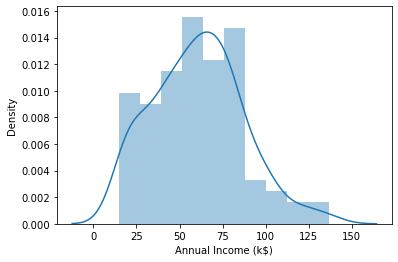

In [23]:
#Distribution of annual income of the customers.

sns.distplot(mall['Annual Income (k$)'])


Draw a scatter plot between annual income and spending score

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

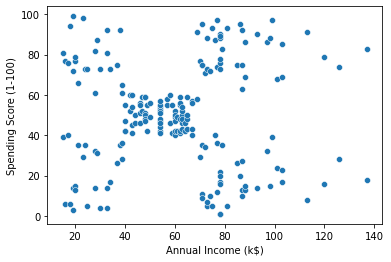

In [26]:
sns.scatterplot(x = mall['Annual Income (k$)'],y= mall['Spending Score (1-100)']) 

## Data Preprocessing

In [28]:
mall_dummy = pd.get_dummies(mall,columns =['Gender'],drop_first = True)
mall_dummy.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [30]:
mall_final = mall_dummy.drop(columns = ['CustomerID'])
mall_final.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## Building the clustering model

In [32]:
from sklearn.cluster import KMeans

In [33]:
#Choosing the number of clusters is very critical in a clustering problem

#We need to plot the number of clusters in x-axis and we will plot the error in y axis (WCSS).

In [34]:
for k in range(1,16):
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [42]:
error= []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit(mall_final) 
    error.append(km.inertia_)

In [43]:
error

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104422.83498539752,
 75412.59682443162,
 58348.64136331504,
 51147.01731797612,
 44357.32664902663,
 40655.6862137862,
 37173.66101028601,
 34539.38956809474,
 31972.758897660067,
 29934.77303252302,
 28235.57170148691,
 26222.158813700895]

/Users/ssameer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

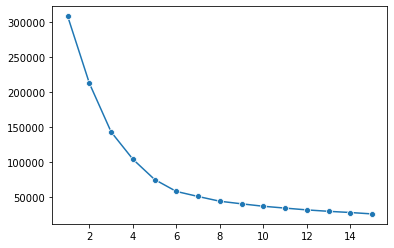

In [51]:
sns.lineplot(range(1,16),error,marker = 'o')

In [55]:
# We can choose the number of clusters as 5
km = KMeans(n_clusters=5)
km.fit(mall_final)

KMeans(n_clusters=5)

In [56]:
mall_dummy['Clusters'] = km.predict(mall_final)

In [57]:
mall_dummy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,1,19,15,39,1,0
1,2,21,15,81,1,4
2,3,20,16,6,0,0
3,4,23,16,77,0,4
4,5,31,17,40,0,0
...,...,...,...,...,...,...
195,196,35,120,79,0,3
196,197,45,126,28,0,2
197,198,32,126,74,1,3
198,199,32,137,18,1,2


In [59]:
mall_dummy.groupby('Clusters').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Clusters,,,,,
0,23.000000,45.217391,26.304348,20.913043,0.391304
1,86.265823,43.088608,55.291139,49.569620,0.417722
2,163.500000,40.666667,87.750000,17.583333,0.527778
3,162.000000,32.692308,86.538462,82.128205,0.461538
4,24.000000,25.521739,26.304348,78.565217,0.391304


/Users/ssameer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

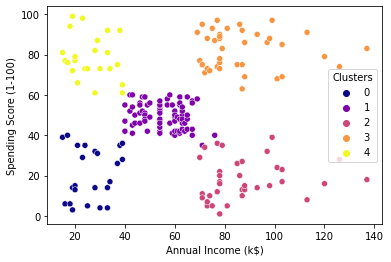

In [61]:
sns.scatterplot(mall_dummy['Annual Income (k$)'],mall_dummy['Spending Score (1-100)']
                ,hue=mall_dummy['Clusters'],palette='plasma')